In [17]:
!pip install tensorflow
!pip install datasets
!pip install transformers

In [18]:
!pip install tensorflow-addons

In [28]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow_addons as tfa

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

print(tf.__version__)

2.15.0


In [29]:
import numpy as np
import tensorflow_datasets as tfds

In [19]:
def preprocess(image, label):
    image = tf.image.resize(image, [96, 96])
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    return image, label


In [20]:
def augment(image, label):
    image = tf.image.resize(image, [96, 96])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1) # Adjust brightness by up to 10%
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1) # Adjust contrast between 90% and 110%
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


(ds_train, ds_validation), ds_info = tfds.load(
    'malaria',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True,
)

train_ds = ds_train.map(augment).batch(32).prefetch(tf.data.AUTOTUNE)

val_ds = ds_validation.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [21]:
img_width = 96
img_height= 96

**Building the CNN Model**

In [22]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape =(img_width, img_height,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32, (3,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 47, 47, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 10, 10, 64)       

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(train_ds,
                    epochs= 15,
                    validation_data = val_ds,)

Epoch 1/15
689/689 [==============================] - 40s 54ms/step - loss: 0.2736 - accuracy: 0.8880 - val_loss: 0.1575 - val_accuracy: 0.9528
Epoch 2/15
689/689 [==============================] - 24s 35ms/step - loss: 0.1549 - accuracy: 0.9541 - val_loss: 0.1453 - val_accuracy: 0.9556
Epoch 3/15
689/689 [==============================] - 24s 34ms/step - loss: 0.1417 - accuracy: 0.9573 - val_loss: 0.1414 - val_accuracy: 0.9556
Epoch 4/15
689/689 [==============================] - 25s 36ms/step - loss: 0.1360 - accuracy: 0.9582 - val_loss: 0.1586 - val_accuracy: 0.9543
Epoch 5/15
689/689 [==============================] - 24s 35ms/step - loss: 0.1296 - accuracy: 0.9580 - val_loss: 0.1426 - val_accuracy: 0.9565
Epoch 6/15
689/689 [==============================] - 22s 31ms/step - loss: 0.1287 - accuracy: 0.9581 - val_loss: 0.1285 - val_accuracy: 0.9563
Epoch 7/15
689/689 [==============================] - 23s 34ms/step - loss: 0.1243 - accuracy: 0.9599 - val_loss: 0.1279 - val_accuracy:

In [26]:
history.history

{'loss': [0.2735704481601715,
  0.15492020547389984,
  0.14169761538505554,
  0.13598333299160004,
  0.12960539758205414,
  0.12869295477867126,
  0.12430005520582199,
  0.11780664324760437,
  0.11736880242824554,
  0.11234132945537567,
  0.11279087513685226,
  0.11058202385902405,
  0.10915316641330719,
  0.10611608624458313,
  0.10457047820091248],
 'accuracy': [0.8879615068435669,
  0.9541413187980652,
  0.957271158695221,
  0.9582237005233765,
  0.9579969048500061,
  0.9581329822540283,
  0.9599020481109619,
  0.9613081812858582,
  0.9617164134979248,
  0.96244215965271,
  0.9632132649421692,
  0.9628503918647766,
  0.9638029336929321,
  0.9652998447418213,
  0.9652091264724731],
 'val_loss': [0.1574515849351883,
  0.14534011483192444,
  0.14135736227035522,
  0.1585797518491745,
  0.14264938235282898,
  0.1285107135772705,
  0.12787014245986938,
  0.12454645335674286,
  0.12214852124452591,
  0.12461575120687485,
  0.12822555005550385,
  0.12002547085285187,
  0.12855343520641327,

In [27]:
model.save('model_1.keras')

In [31]:
def plot_learningCurve(history, epoch):
  epoch_range= range(1, epoch+1)
  #plot training and validation accuracy values
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  #plot training and validation accuracy values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

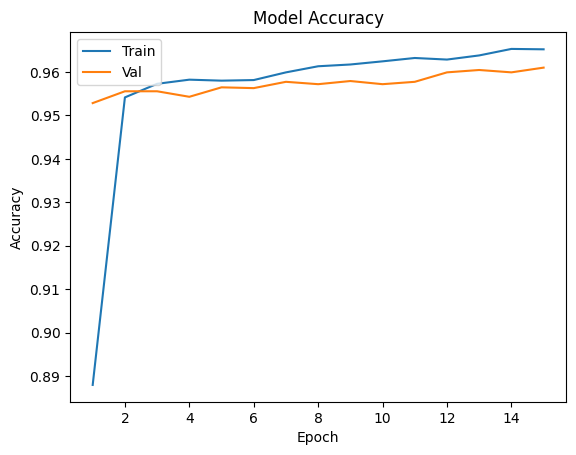

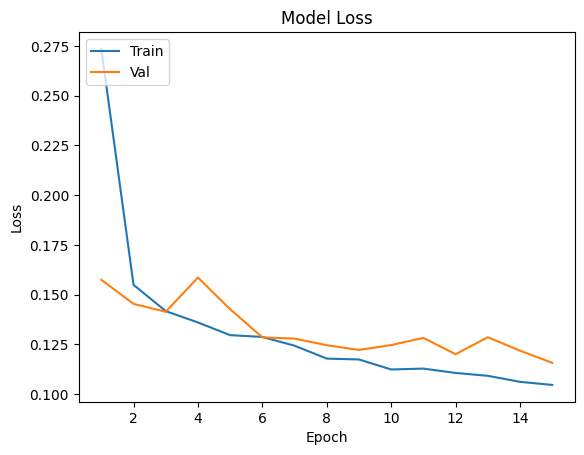

In [32]:
plot_learningCurve(history, 15)